In [6]:
### Fur4 Parameters ###

a = 1         # *ubiquitination rate (ms^{-1})
Ae = 47       # endosomal membrane surface area (micrometers^3)
Ap = 314      # plasma membrane surface area (micrometers^3)
b = 1         # *deubiquitination rate (ms^{-1})
f = 0.25      # *fur4 recycling rate (ms^{-1})
g = 0.1       # *fur4 endocytosis rate (ms^{-1})
j = 10**2     # *uracil unbinding rate (ms^{-1})
Kd = 0.74     # uracil dissociation constant (micromolars)
k = j / Kd    # *uracil binding rate (micromolars^{-1}ms^{-1})
Km = 2.5      # uracil Michaelis-Menten constant (micromolars)
V = 523       # volume of cytoplasm (micrometers^3)
vmax = 88 / 6 # maximal rate of uracil metabolism (micrommolars*micrometers^3ms^{-1})
w = 32        # scale factor for pH
y = 5 / 6000  # *fur4 production rate (# Fur4)*ms^{-1}
z = 0.002     # *degradation rate (ms^{-1})

In [7]:
def fur4_model(t, y, parameters):

    # unpack parameters
    P, Pb, Pu, E, Eb, Eu, S = y
    a, b, f, g, j, y, z, Se = parameters
    k = j / Kd
    
    # Define derivatives
    dP = y - (k * Se * P) - ((k / w) * S * P) + (j * Pb) + (f * (Ae / Ap) * E)
    dPb = (k * Se * P) + ((k / w) * S * P) - (j * Pb) - (a * Pb)
    dPu = (a * Pb) - (g * Pu)
    dE = (b * Eu) - ((k / w) * S * E) + (j * Eb) - (f * E)
    dEb = ((k / w) * S * E) - (j * Eb) - (a * Eb)
    dEu = (g * (Ap / Ae) * Pu) - (b * Eu) + (a * Eb) - (z * Eu)
    dS = - ((k / w) * S * ((Ap / V) * P + (Ae / V) * E)) + ((j + a) *
        ((Ap / V) * Pb + (Ae / V) * Eb)) - ((vmax * S) / (V * (Km + S)))
    
    return [dP, dPb, dPu, dE, dEb, dEu, dS]

parameter_ranges = [    # list of lists (a, b, f, g, j, k, y, z, Se)
    [0.1, 10],        # a: ubiquitination
    [0.1, 10],        # b: deubiquitination
    [0.025, 2.5],     # f: recycling rate
    [0.01, 1],        # g: endocytosis rate
    [10, 1000],       # j: unbinding
    # k = j / Kd not varied independently
    [5/60000, 5/600], # y: production
    [0.0002, 0.02],   # z: degradation
    [0.0001, 1]       # Se: extracellular uracil
]

In [20]:
from matplotlib import pyplot as plt

def scatter_plot(results, aggregated=None, output_dir=None, show=True):
    """Plot a scatter plot of the mu_star and sigma results from Morris sensitivity analysis (used morris to sample and analyze).
    
    Parameters
    ----------
    results: dict
        dictionary of outputs from sensitivity analysis
    aggregated: dict, optional
        dictionary of aggregated results (from aggregate_results function)
    output_dir: string, optional
        location to save output"""
    
    # get the sigma and mu vals for each parameter
    if aggregated:
        mu_vals = aggregated["mu_star"]["mean"]
        sigma_vals = aggregated["sigma"]["mean"]
        labels = aggregated['parameter_names']
    elif results:
        mu_vals = results["sensitivity_indices"]["mu_star"]
        sigma_vals = results["sensitivity_indices"]["sigma"]
        labels = results['parameter_names']
    else:
        raise ValueError("Must provide results or aggregate dictionary.")

    # create the scatter plot
    plt.scatter(mu_vals, sigma_vals)
    for i, label in enumerate(labels):   # label each point
        plt.annotate(label, (mu_vals[i], sigma_vals[i]), (5, 5), textcoords='offset points',
                     ha='left', va='bottom')
    plt.title("Morris Sensitivity Analysis")
    plt.xlabel("$\mu$")
    plt.ylabel("$\sigma$")
    plt.tight_layout()

    # save and show
    if output_dir:
        plt.savefig(output_dir)
    if show:
        plt.show()

In [ ]:
results = [
    {'timestamp': '2025-07-14T16:48:04.792139', 'seed': None, 
     'sensitivity_indices': {'mu': [-31.21139694378139, 9.048180251077083, 18.189825094614417, 13.316974590503715, 38.05959168065331, 35.276920189741546, -8.478453929210945, 18.669239987242108], 
                             'mu_star': [39.67299936933151, 47.55028868061057, 46.347152245371035, 45.5579608579323, 55.059943808630685, 53.34738330534879, 47.83452362129302, 34.45529511915605], 
                             'mu_star_conf': [11.915937383224502, 13.510477225849396, 12.435312228231354, 12.036976592665107, 16.93983098432992, 11.598550565052973, 11.974214238777574, 14.503381463800855], 
                             'sigma': [54.44540217497016, 71.2576487488153, 66.13652683121387, 62.95653097347736, 83.29497848608771, 66.11294069822097, 68.97082437274975, 65.28878481253234]},
     'parameter_names': ['a', 'b', 'f', 'g', 'j', 'y', 'z', 'Se']},
    {'timestamp': '2025-07-14T16:56:06.628573', 'seed': None, 
     'sensitivity_indices': {'mu': [-40.18089845731121, 7.9051852406707255, 23.302238518973468, 5.228599449243551, 35.57380326741519, 32.837639302094736, -3.3267456674578235, 23.97009448438145], 
                             'mu_star': [46.11203528544829, 49.227370875307486, 48.04284242809444, 48.58290803180534, 58.9308422897076, 52.919580998269176, 49.285161868976985, 32.61488198695436], 
                             'mu_star_conf': [19.02034528217928, 18.414823272573596, 15.59833654767192, 11.990721123769916, 20.63011744566444, 14.354782730715941, 14.106159715127223, 13.581576282803388], 
                             'sigma': [82.96544804542518, 83.3500939463726, 74.04712370407162, 74.12500601690333, 94.91149486146256, 71.96158288399901, 80.00975144850997, 56.45177005585346]}, 
     'parameter_names': ['a', 'b', 'f', 'g', 'j', 'y', 'z', 'Se']},
    {'timestamp': '2025-07-14T17:05:01.656434', 'seed': None, 
     'sensitivity_indices': {'mu': [-38.1141679208139, -1.0931733518900875, 18.07107249134957, 17.29413229356056, 22.726792150789286, 30.202163539825225, 8.817416325828273, 18.81955057994683], 
                             'mu_star': [46.116558874943834, 41.75136274253169, 52.0235410004266, 52.68650409561018, 55.63192772526711, 59.07616347414183, 50.29712374135905, 35.39596741055222], 
                             'mu_star_conf': [15.956152752395226, 12.21225563515483, 14.822210798683386, 11.623776900669412, 16.23487619331889, 15.615309510206753, 12.196362948715237, 13.949777612425962], 
                             'sigma': [71.84645372807121, 65.82245048929761, 77.35364028470104, 74.103534322296, 80.53355097140408, 84.33635499275769, 71.8960440680765, 63.686959760133114]}, 
     'parameter_names': ['a', 'b', 'f', 'g', 'j', 'y', 'z', 'Se']},
    {'timestamp': '2025-07-14T17:19:24.107362', 'seed': None, 'sensitivity_indices': {'mu': [-37.206813280010664, 3.1155657018665988, 24.21569632217835, 17.8103326806633, 27.317028184380362, 38.30355045472487, -1.8638503711303382, 19.09193674960595], 'mu_star': [44.15174625041888, 49.80558592061648, 50.58151912464989, 50.35274973657799, 55.45080368930388, 56.619903156749224, 49.14301287404309, 32.603279361487175], 'mu_star_conf': [14.219750838792999, 16.903960917283364, 14.97980866544805, 11.066422154482467, 16.52518888229924, 17.572820896505426, 16.36981182094333, 10.729894754062212], 'sigma': [73.90069391030575, 87.4355486225514, 78.02193551782781, 67.80247029549521, 85.70748337804834, 79.18207688942277, 85.56016824112791, 56.45189244389349]}, 
     'parameter_names': ['a', 'b', 'f', 'g', 'j', 'y', 'z', 'Se']}
]

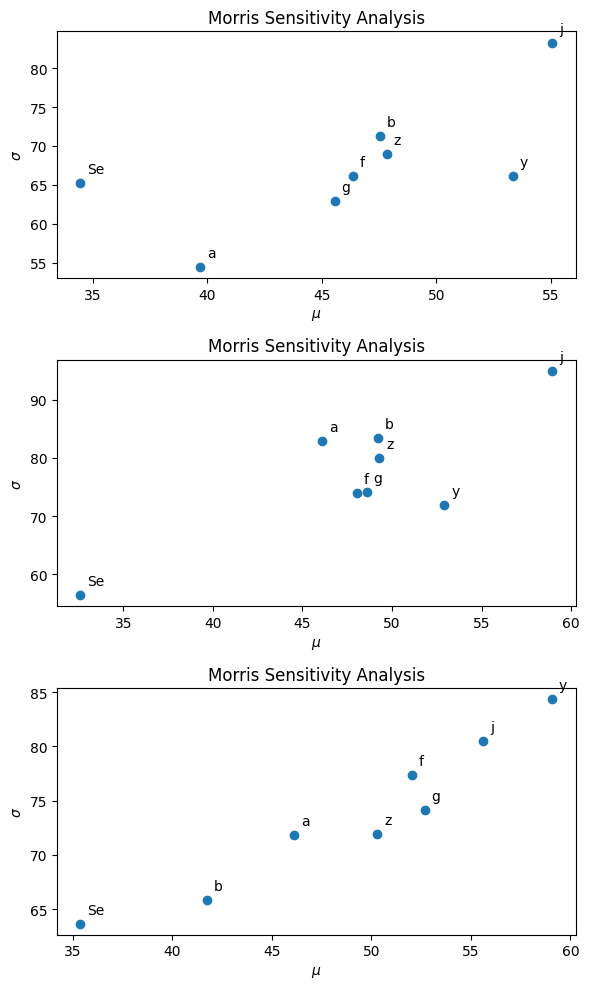

In [ ]:
plt.figure(figsize=(6, 10))
plt.subplot(3, 1, 1)
scatter_plot(results[0], show=False)
plt.subplot(3, 1, 2)
scatter_plot(results[1], show=False)
plt.subplot(3, 1, 3)
scatter_plot(results[2], show=False)
plt.tight_layout()

# plt.savefig("fur4_parameter_sensitivity.png")
plt.show()

Starting multiprocessing


Running model in parallel:   0%|          | 0/576 [00:00<?, ?it/s]

{'timestamp': '2025-07-14T17:19:24.107362', 'seed': None, 'sensitivity_indices': {'mu': [-37.206813280010664, 3.1155657018665988, 24.21569632217835, 17.8103326806633, 27.317028184380362, 38.30355045472487, -1.8638503711303382, 19.09193674960595], 'mu_star': [44.15174625041888, 49.80558592061648, 50.58151912464989, 50.35274973657799, 55.45080368930388, 56.619903156749224, 49.14301287404309, 32.603279361487175], 'mu_star_conf': [14.219750838792999, 16.903960917283364, 14.97980866544805, 11.066422154482467, 16.52518888229924, 17.572820896505426, 16.36981182094333, 10.729894754062212], 'sigma': [73.90069391030575, 87.4355486225514, 78.02193551782781, 67.80247029549521, 85.70748337804834, 79.18207688942277, 85.56016824112791, 56.45189244389349]}, 'parameter_names': ['a', 'b', 'f', 'g', 'j', 'y', 'z', 'Se']}


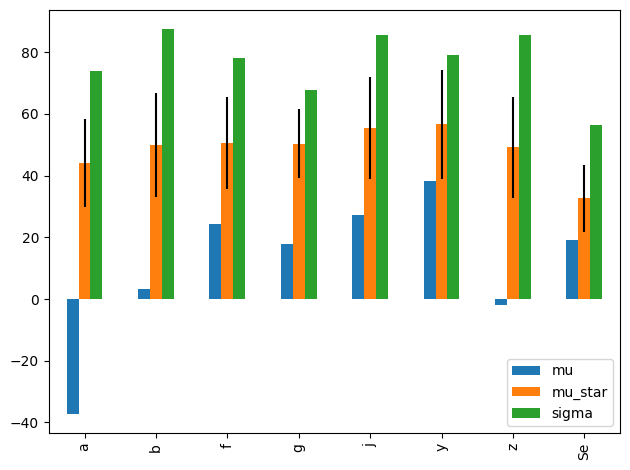

In [25]:
from multiprocessing import Pool
from SALib.sample import sobol as sobol_sample, morris as morris_sample
from SALib.analyze import sobol, morris
from scipy.integrate import solve_ivp
from tqdm.notebook import tqdm
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

# set up problem
problem = {
    'num_vars': 8,
    'names': ['a', 'b', 'f', 'g', 'j', 'y', 'z', 'Se'],
    'bounds': parameter_ranges
}

# generate samples using Saltelli sampler
param_values = sobol_sample.sample(problem, 32)

# loop over sample inputs and run model
Y = np.zeros([param_values.shape[0]])

def run_model(X):
    # set up for use with solve_ivp
    y0 = [0, 0, 0, 0, 0, 0, 0]
    t_span = (0, 50)
    t_eval = np.linspace(*t_span, 10)
    
    sol = solve_ivp(fur4_model, t_span, y0, args=(X,), t_eval=t_eval)
    return sum(sol.y[:, -1])

print("Starting multiprocessing")
# Use multiprocessing to run the model in parallel
with Pool(3) as pool:
    # Use map instead of imap to maintain order
    Y = list(tqdm(pool.imap(run_model, param_values), 
                    total=len(param_values),
                    desc="Running model in parallel"))

# Convert to numpy array
Y = np.array(Y)

# compute sensitivity indices using model outputs
Si = morris.analyze(problem, param_values, Y)
print({'timestamp': datetime.now().isoformat(),
        'seed': None,
        'sensitivity_indices': {
            'mu': Si['mu'].tolist(),
            'mu_star': Si['mu_star'].tolist(),
            'mu_star_conf': Si['mu_star_conf'].tolist(),
            'sigma': Si['sigma'].tolist() if 'sigma' in Si else None,
        },
        'parameter_names': problem['names']})

Si.plot()
plt.tight_layout()
#plt.savefig("Images/sensitivity_analysis/morris_from_og_system_ai_params_3.png")
plt.show()